In [3]:
import pickle
# path=r'D:\MyWorks\糖尿病预测\强化学习方法\rl4bg\bgp\saves\basal_bolus\bb_adolescent#001_seed0.pkl'
path=r'saves/adolescent#001_0/ep_r_list_GRUQ.pkl'
with open(path,'rb') as f:
    a=pickle.load(f)
print(a)



[-100051.44488887394, -200104.75574922992, -300158.93154880055, -400210.08187113336, -500261.4892080056, -600315.693375387, -700370.5566655861, -100054.59802957223, -200109.1221830138, -300163.76433993096, -400216.7754329583, -500270.8428076926, -600324.1049582472, -700378.9141414688, -800434.0484449399, -900487.1614039495, -1000539.7052780128, -100054.81843144249, -200107.37356629528, -100055.30071053606, -200110.2907525578, -300165.2702044215, -100054.90059962923, -200108.87918180684, -300165.1359684833, -11.532020786278006, -100051.72393918877, -200106.51695911752, -300161.2735065735, -100054.31146329675, -200109.48221948263, -300163.5980294837, -400216.905989289, -100055.49202619116, -200111.0924786677, -300167.0710098705, -400222.1054095845, -500276.33310975146, -600329.4076061118, -700385.9777775378, -100055.52272437658, -200109.79479367277, -300165.4076380058, -400221.48316436884, -500277.2061250604, -600331.7686232125, -100056.27019580561, -200109.16034842608, -100052.409560458

In [5]:
import numpy as np
import joblib
from collections import namedtuple
import matplotlib.pyplot as plt
import itertools
# plt.rcParams['font.sas-serig']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# %pylab inline

Seeds = namedtuple('seeds', ['numpy_seed', 'sensor_seed', 'scenario_seed'])
name = 'basal_bolus'
server = 'mld4'
source_path = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg/bgp'
save_path = 'saves'
full_path = '{}/{}'.format(save_path, name)


seeds = [i for i in range(5)]
# patients = (['adolescent#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
#             ['child#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
#             ['adult#0{}'.format(str(i).zfill(2)) for i in range(1, 11)])
patients = (['child#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
            ['adolescent#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
            ['adult#0{}'.format(str(i).zfill(2)) for i in range(1, 11)])
settings = itertools.product(patients, seeds)

# 获取bb方法得到的每个病人的risk值
bb_risk_mean={}
for name,seed in settings:
    data=joblib.load('{}/bb_{}_seed{}.pkl'.format(full_path, name, seed))
    if name not in bb_risk_mean:
        bb_risk_mean[name]=[data['Risk'].mean()]
    else:
         bb_risk_mean[name].append(data['Risk'].mean())

In [6]:
import joblib
from collections import namedtuple
import matplotlib.pyplot as plt
import itertools
# plt.rcParams['font.sas-serig']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# %pylab inline

data_dir = 'saves' # '/data/dir'
source_dir = 'D:/MyWorks/糖尿病预测/强化学习方法/rl4bg'  # '/source/dir'
name = 'pid_random_meal'
save_dir = '{}/{}'.format(data_dir, name)

person_options = (['adolescent#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
                  ['child#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
                  ['adult#0{}'.format(str(i).zfill(2)) for i in range(1, 11)])
n_days = 10
n_seeds = 100
n_seeds = 5
seed_offset = 1234
full_save = False
residual_bolus = False
tstd_options = [0.1, 1, 10]
pid_res={}
for person in person_options:
    a=joblib.load('{}/{}_simulation.pkl'.format(save_dir, person))
    risk_list=[]
    for i in a:
        risk_list.append(i['hist']['Risk'].mean())
    pid_res[person]=risk_list


[Text(0, 0.0, '$10^0$'),
 Text(0, 0.3010299956639812, ''),
 Text(0, 0.47712125471966244, ''),
 Text(0, 0.6020599913279624, ''),
 Text(0, 0.6989700043360189, ''),
 Text(0, 0.7781512503836436, ''),
 Text(0, 0.8450980400142568, ''),
 Text(0, 0.9030899869919435, ''),
 Text(0, 0.9542425094393249, ''),
 Text(0, 1.0, '$10^1$'),
 Text(0, 1.3010299956639813, ''),
 Text(0, 1.4771212547196624, ''),
 Text(0, 1.6020599913279623, ''),
 Text(0, 1.6989700043360187, ''),
 Text(0, 1.7781512503836436, ''),
 Text(0, 1.845098040014257, ''),
 Text(0, 1.9030899869919435, ''),
 Text(0, 1.954242509439325, ''),
 Text(0, 2.0, '$10^2$'),
 Text(0, 2.3010299956639813, ''),
 Text(0, 2.4771212547196626, ''),
 Text(0, 2.6020599913279625, ''),
 Text(0, 2.6989700043360187, ''),
 Text(0, 2.7781512503836434, ''),
 Text(0, 2.845098040014257, ''),
 Text(0, 2.9030899869919438, ''),
 Text(0, 2.9542425094393248, '')]

<Figure size 800x800 with 0 Axes>

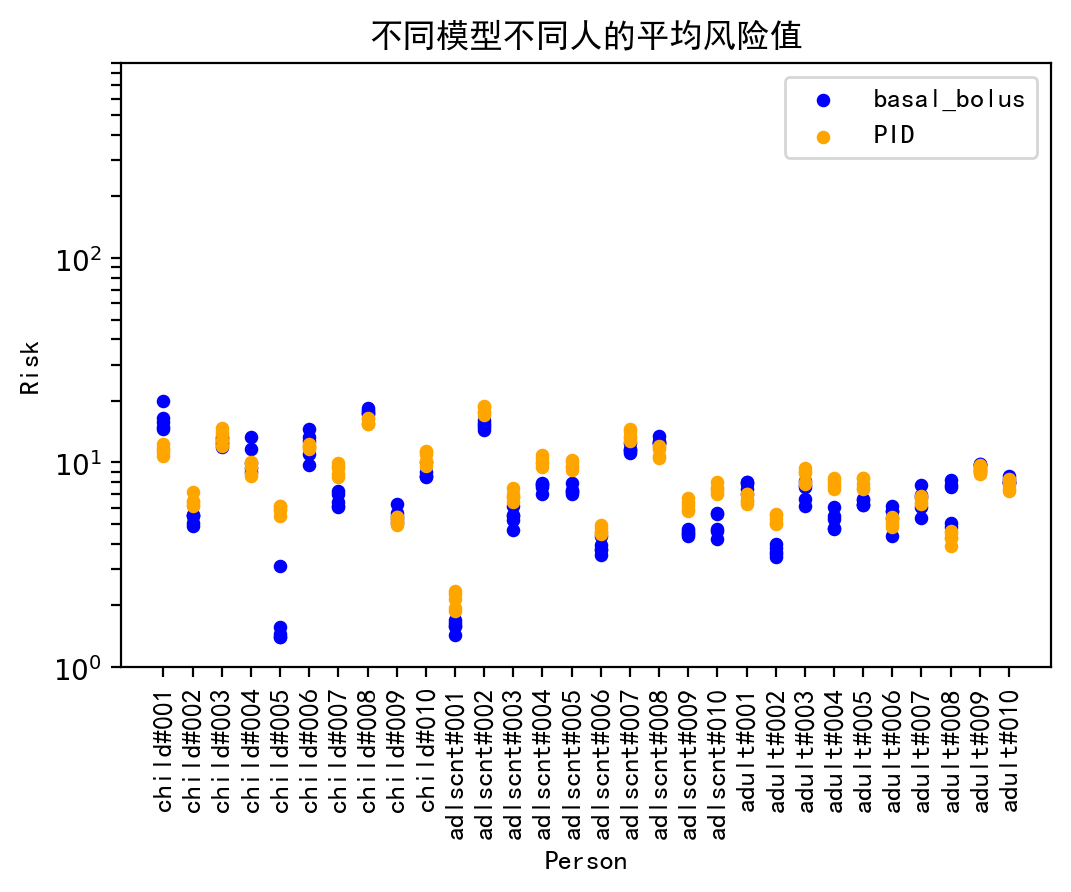

In [56]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(4,4),dpi=200)
fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
for patient in bb_risk_mean.keys():
    bb_x=[]
    bb_y=[]
    for risk_mean in bb_risk_mean[patient]:
        bb_x.append(patient)
        bb_y.append(np.log10(risk_mean))
    ax.scatter(bb_x,bb_y,color='blue',s=15,label='basal_bolus')

    pid_x=[]
    pid_y=[]
    for risk_mean in pid_res[patient]:
        pid_x.append(patient)
        pid_y.append(np.log10(risk_mean))

    ax.scatter(pid_x,pid_y,color='orange',s=15,label='PID')

# 设置坐标轴
patients_short = (['child#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
            ['adlscnt#0{}'.format(str(i).zfill(2)) for i in range(1, 11)] +
            ['adult#0{}'.format(str(i).zfill(2)) for i in range(1, 11)])
plt.xticks(range(len(patients)),patients_short,rotation='vertical')
plt.xlabel('Person')
plt.ylabel('Risk')
# plt.ylim(0,30)
plt.yticks([0,1,2])
# plt.ytickslabels(['1','10','100'])
plt.legend(['basal_bolus','PID'])
plt.title('不同模型不同人的平均风险值')
# 设置指数形式的纵坐标
ytrick=[]
for mul in [1,10,100]:
    for i in range(1,10):
        ytrick.append(np.log10(i*mul))
        # ytrick.append(i*mul)
ytrick_label=['']*len(ytrick)
ytrick_label[0]=r'$10^0$'
ytrick_label[9]=r'$10^1$'
ytrick_label[18]=r'$10^2$'

ax.set_yticks(ytrick)
ax.set_yticklabels(ytrick_label)

Text(0.5, 1.0, 'adolescent#001网络训练过程')

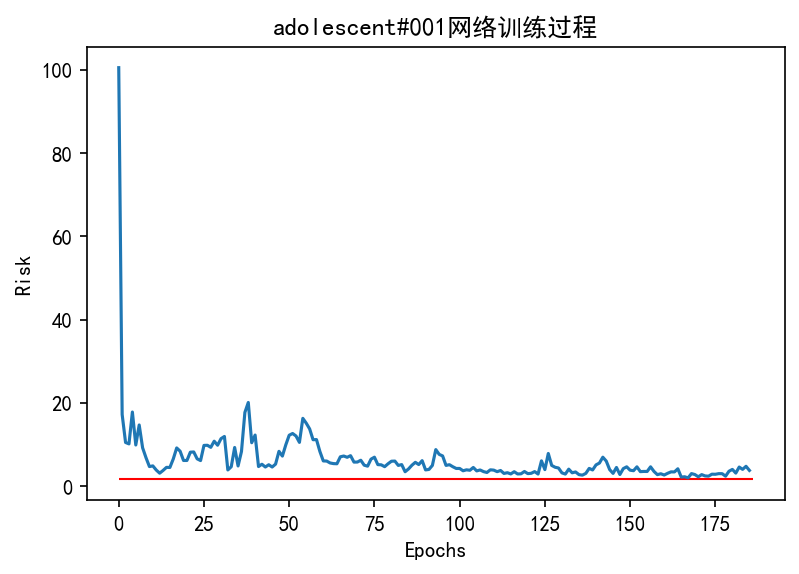

In [113]:
import pandas as pd 
data=pd.read_csv('saves_rlkit/dqn/adolescent#001.csv')
data=data.dropna(subset=['Risk'],axis=0).reset_index(drop=True)[:300]
# print(data['Risk'])

plt.figure(figsize=(6,4),dpi=150)
plt.plot(data['Risk'])

# plt.hlines(13.38,0,data.shape[0],colors='red',lw=1)
plt.hlines(1.6,0,data.shape[0],colors='red',lw=1)
# plt.hlines(9.83,0,data.shape[0],colors='red',lw=1)
plt.xlabel('Epochs')
plt.ylabel('Risk')
plt.title('adolescent#001网络训练过程')